# Boundary forcings with cutout

In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

In [2]:
#import xarray as xr
from anemoi.datasets import open_dataset
import numpy as np
import matplotlib.pyplot as plt

In [37]:
dir = '/lustre/storeB/project/fou/hi/foccus/datasets/'
#file = dir + 'norkystv3_hindcast_2023_surface.zarr'
file = dir + 'norkystv3-hindcast-3day-surface.zarr'
#ds1 = open_dataset(file, thinning=4, trim_edge=(10, 10, 10, 10)) 
#ds2 = open_dataset(file, thinning=4) 

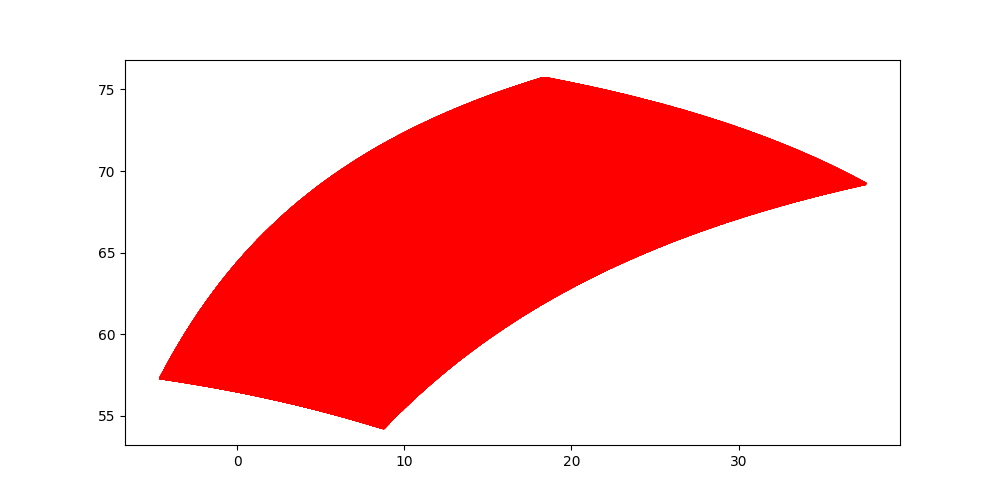

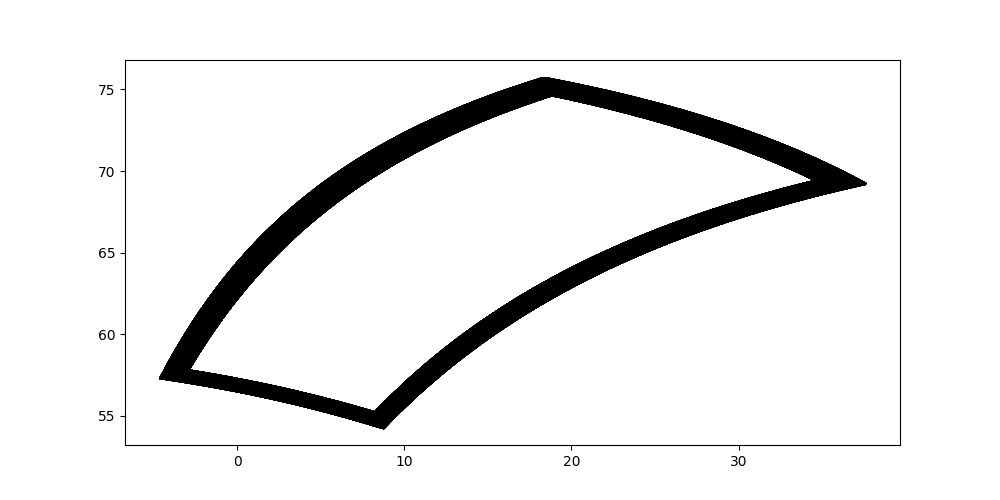

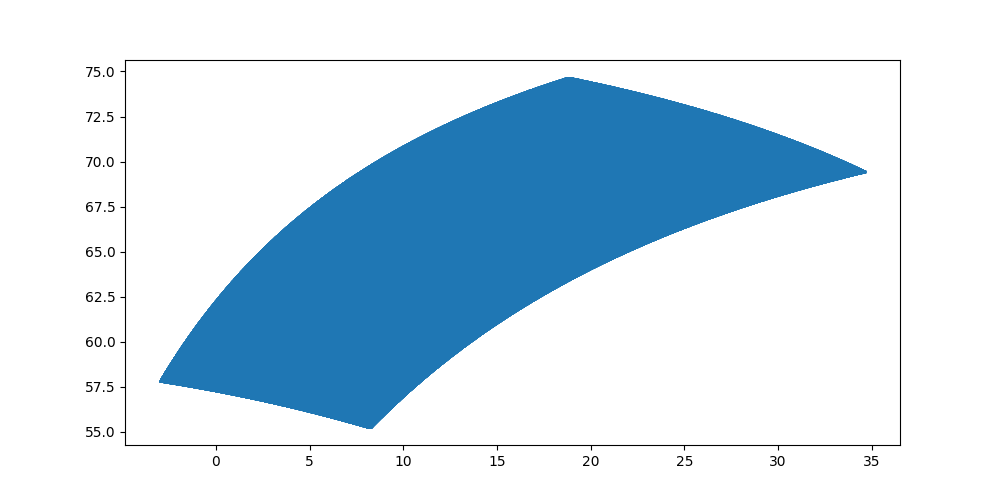

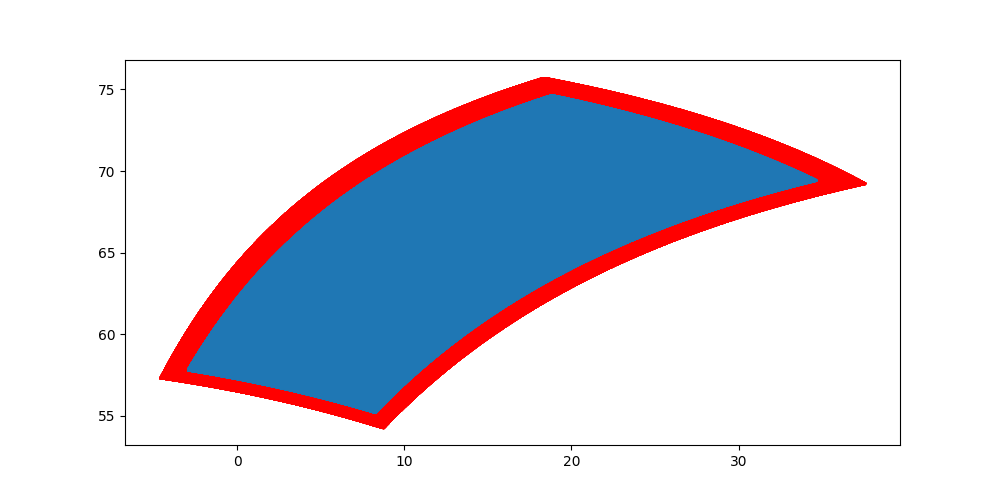

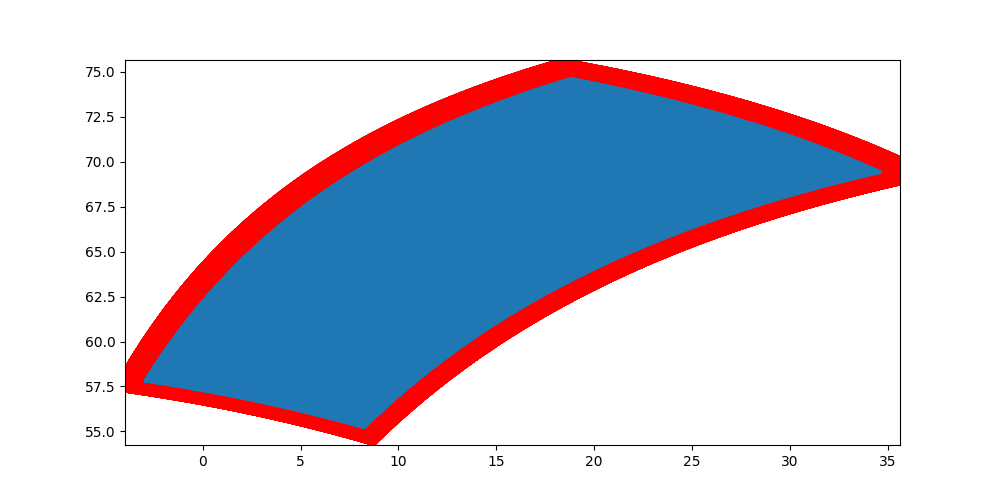

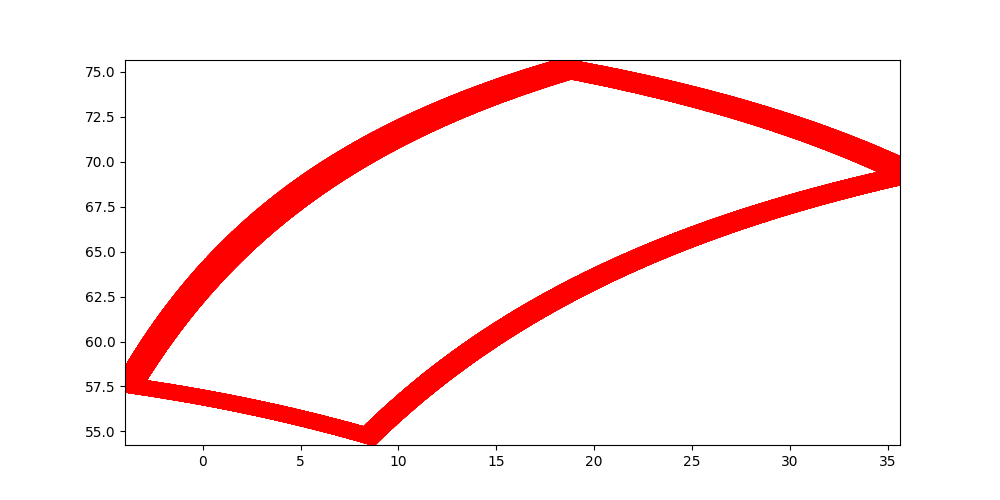

In [52]:
ds_trim_edge = open_dataset(
    dataset={
        "cutout": [
            {
                "dataset": file,
                "frequency": "3h",
                "trim_edge": 100, 
                #"thinning": 4,
            },
            {
                "dataset": file,
                "frequency": "3h",
                #"thinning": 4,
            },
        ],
        "min_distance_km": 0,
        #"plot": True,
        "plot": "cutout_nothinning",
        #"plot": "cutout_4thinning",
    }
)


In [45]:
ds_trim_edge.grids[0] + ds_trim_edge.grids[1] # = 3153556 when no thinning is applied

np.int64(197169)

In [49]:
ds_trim_edge.frequency

datetime.timedelta(seconds=10800)

In [50]:
ds_trim_edge.shape # 24 time steps over 3 days (frequency 3h)

(24, 11, 1, 197169)

<GeoAxes: >

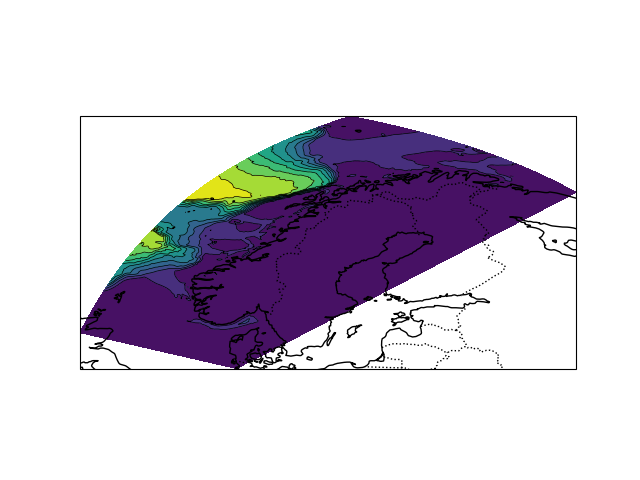

In [51]:
ds_trim_edge.plot('2020-01-01','h')

### Another approach
Open datasets separately, then use cutout

In [4]:
ds1_nothin = open_dataset(file,trim_edge=100) # TODO change to 10 or similar
ds2_nothin = open_dataset(file) 

<GeoAxes: >

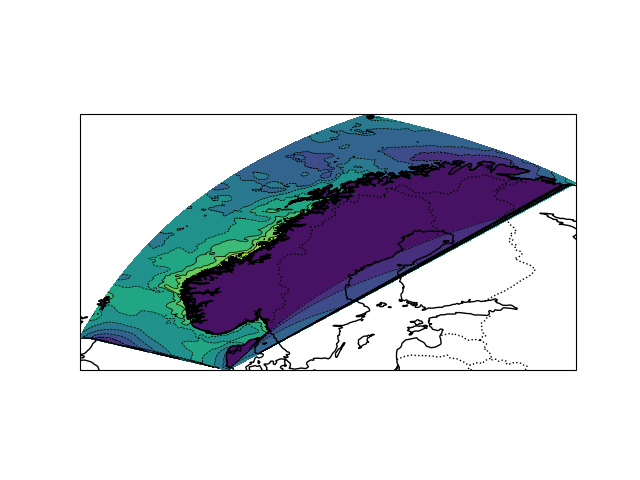

In [6]:
ds1_nothin.plot('2020-01-01','zeta')

<GeoAxes: >

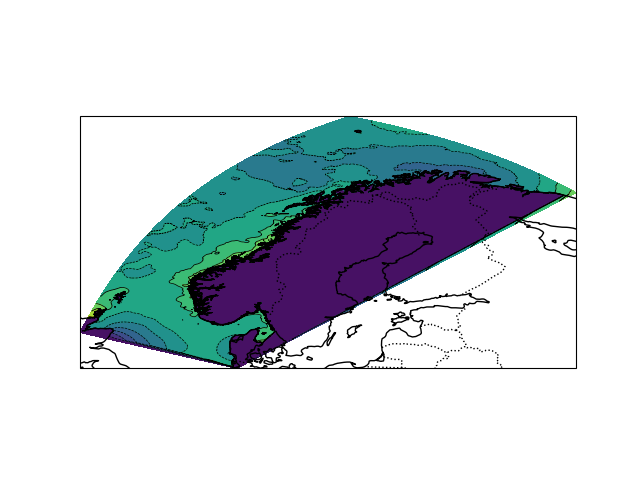

In [9]:
ds2_nothin.plot('2020-01-01','zeta')

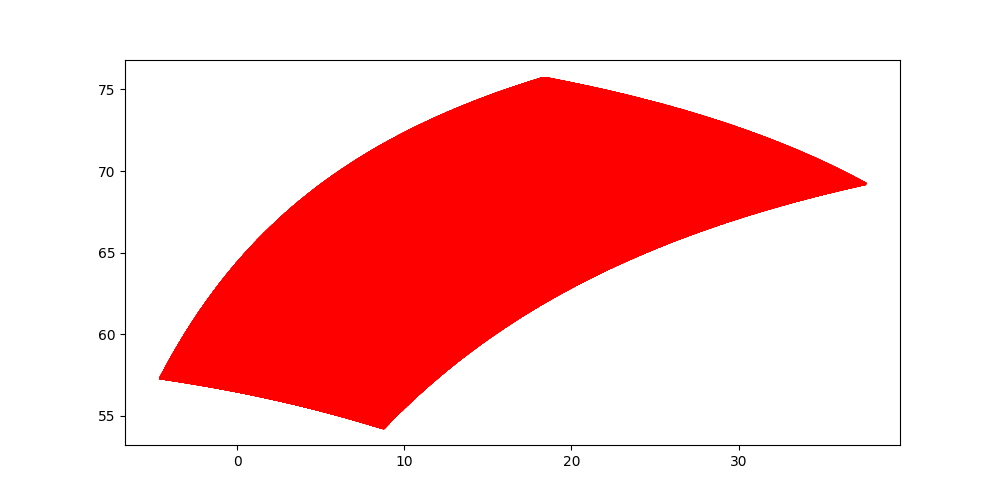

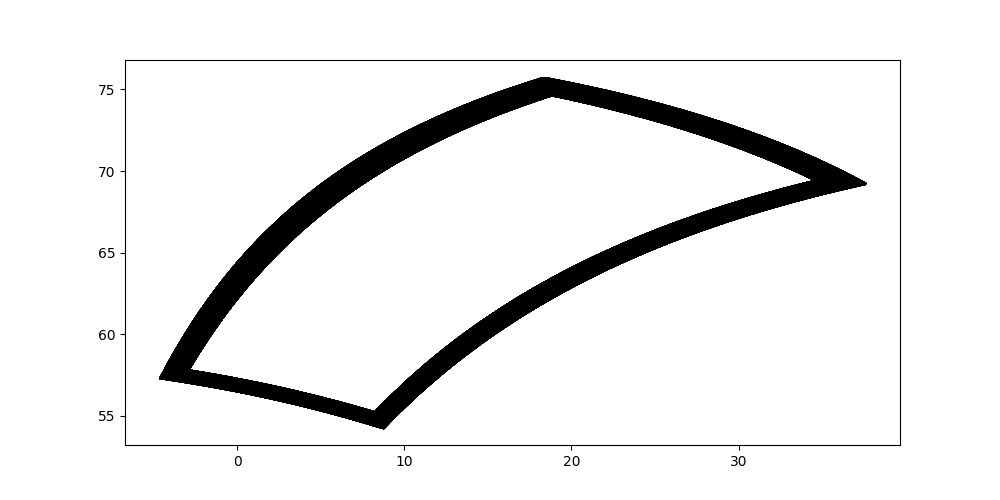

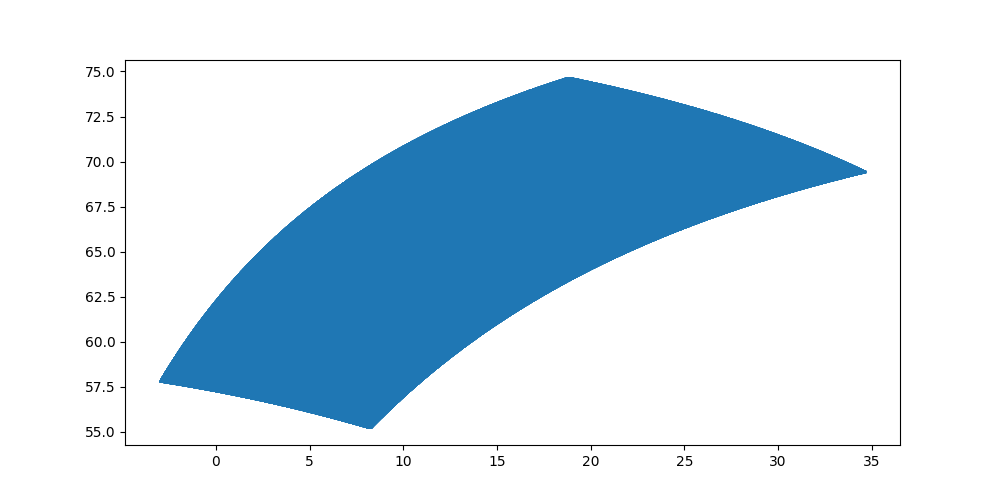

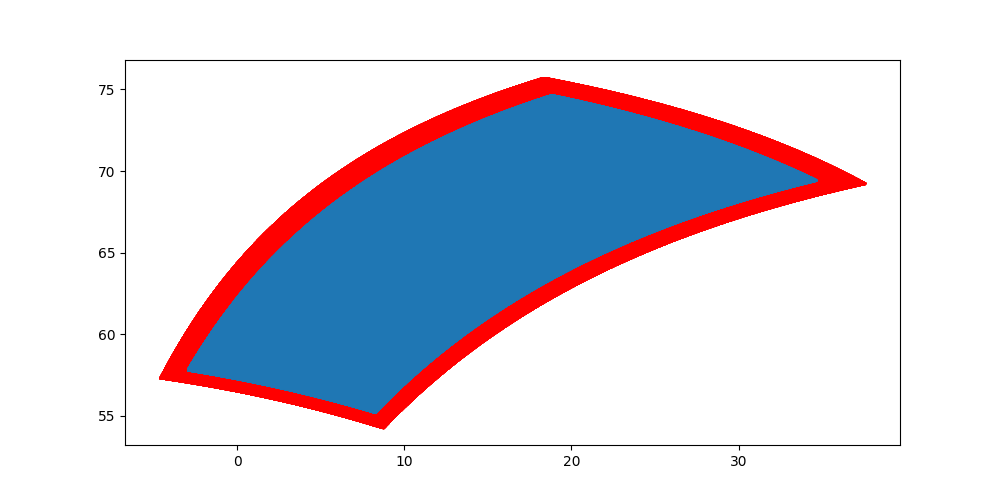

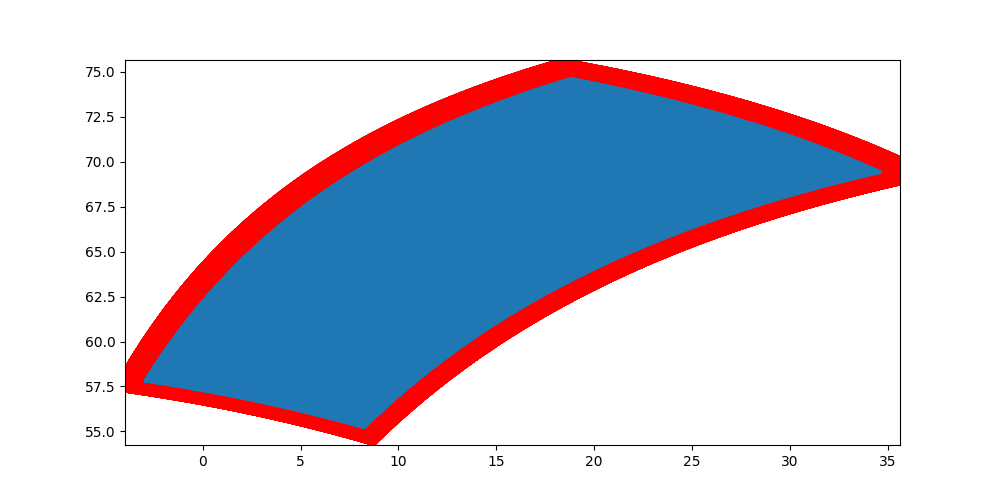

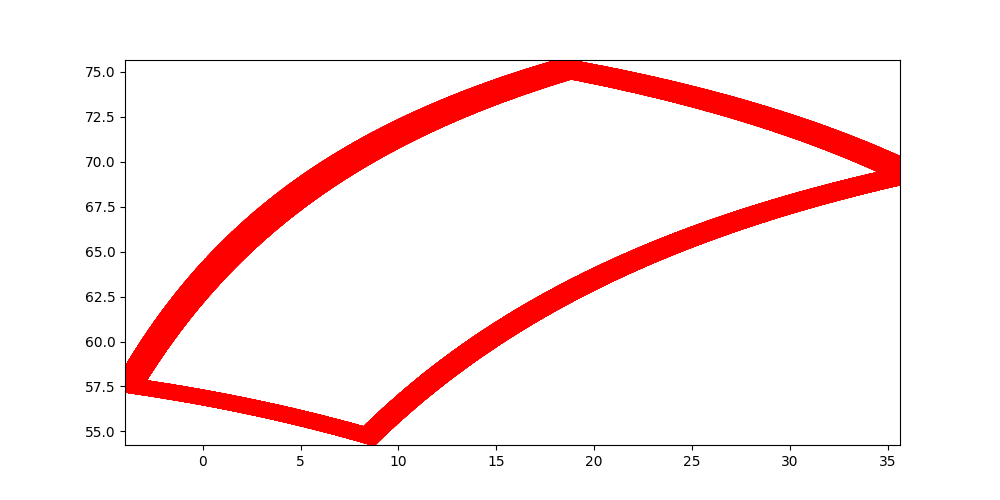

In [5]:
#ds_cutout = open_dataset(cutout=[ds1,ds2],min_distance_km=0,plot=True)
ds_cutout = open_dataset(cutout=[ds1_nothin,ds2_nothin],min_distance_km=0,plot=True)


In [ ]:
#To debug the combination, you can pass plot=True to the cutout function (when running from a Notebook), or use plot=”prefix” to save the plots to series of PNG files in the current directory.

ds_cutout.grids

(np.int64(2414556), np.int64(739000))

# Test to combine hindcast dataset with forcing dataset

In [ ]:
dir = '/lustre/storeB/project/fou/hi/foccus/datasets/'
file_main = dir+'norkystv3_hindcast_2023_surface.zarr'
file_force = dir+'forcing_norkystv3_hindcast_2023010100-2023050100.zarr'

Forcing:

📅 Start      : 2023-01-01 00:00
📅 End        : 2023-05-01 00:00
⏰ Frequency  : 3
🚫 Missing    : 0
🌎 Resolution : o96
🌎 Field shape: [1148, 2747]

📐 Shape      : 961 × 18 × 1 × 3,153,556 (203.2 GiB)
💽 Size       : 82.2 GiB (82.2 GiB)
📁 Files      : 1,067

Hindcast 2023:

📅 Start      : 2023-01-01 00:00
📅 End        : 2023-12-31 23:00
⏰ Frequency  : 1
🚫 Missing    : 0
🌎 Resolution : o96
🌎 Field shape: [1148, 2747]

📐 Shape      : 8,760 × 11 × 1 × 3,153,556 (1.1 TiB)
💽 Size       : 416.2 GiB (416.2 GiB)
📁 Files      : 8,866

In [ ]:
# This code will combine the two datasets and adjust the time axis to the shortest of the two datasets.
# I am not sure if "frequency" required as it should just use the highest frequency of the two datasets.
ds_combined = open_dataset(
    dataset={
        "join": [
            {
                "dataset": file_main,
                #"frequency": "3h",
            },
            {
                "dataset": file_force,
                #"frequency": "3h",
            },
        ],
        "adjust": "dates", #The adjust option is in case the end or start dates do not exactly match.
    }
)

In [34]:
ds_combined.shape

(961, 29, 1, 3153556)

In [35]:
ds_combined.frequency # 10800 seconds= 3 hours

datetime.timedelta(seconds=10800)

<GeoAxes: >

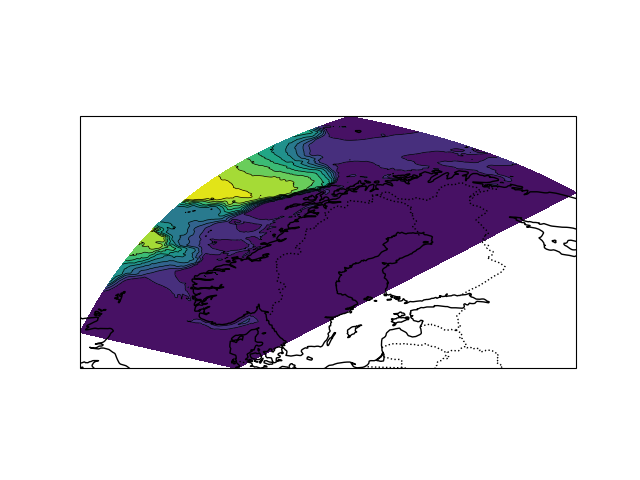

In [ ]:
ds_combined.plot('2023-01-01','h')

<GeoAxes: >

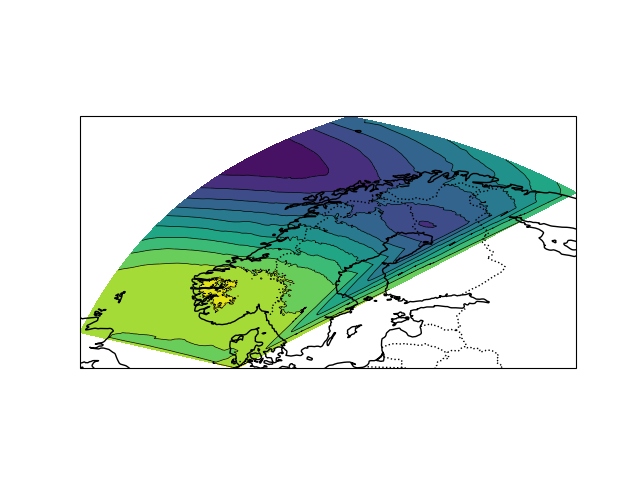

In [ ]:
ds_combined.plot('2023-01-01','Pair')